# Some Things About Visualization

In [1]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib


import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes


## Efficiencies in Visualization

![](images/longersteeper.jpeg)

*your answer here*

4x and 4x

![](images/largerdarker.jpeg)

*your answer here*

10x larger and 2x darker

![](images/biggervalue.jpeg)

*your answer here*

4x

## mtcars dataset

 

The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) but I have extracted some relevant parts below:

```
Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage

mtcars
Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
Source

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

In [2]:
dfcars=pd.read_csv("data/mtcars-edited.csv")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


There are multiple data types here:

![](images/datatypes.png)

In [26]:
dfcars.dtypes

name      object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
maker     object
dtype: object

We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [3]:
av_mpg = dfcars.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

In [4]:
import seaborn as sns

## Using Colors

Now we see maplotlib's default color palette, 'viridis'.

![](images/viridis.png)

This is an example of a **perceptually linear** colormap, as opposed to the rainbow colormap used by Matlab and countless other software.

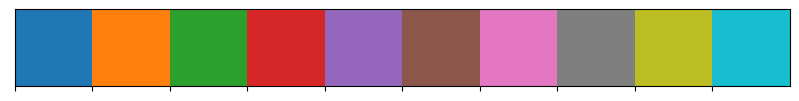

In [5]:
sns.palplot(sns.color_palette());

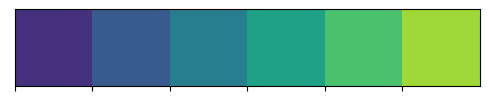

In [37]:
sns.palplot(sns.color_palette("viridis"))

How should you choose colors?

![](images/colorscales.png)

#### Bar Charts

We see that Pandas series very niftily give us bar graphs. Pandas has many other charts. They will use the standard palette. As long as you are using lengths to represent data, you **do not** need more than one color. And length is better!!!

<AxesSubplot:ylabel='maker'>

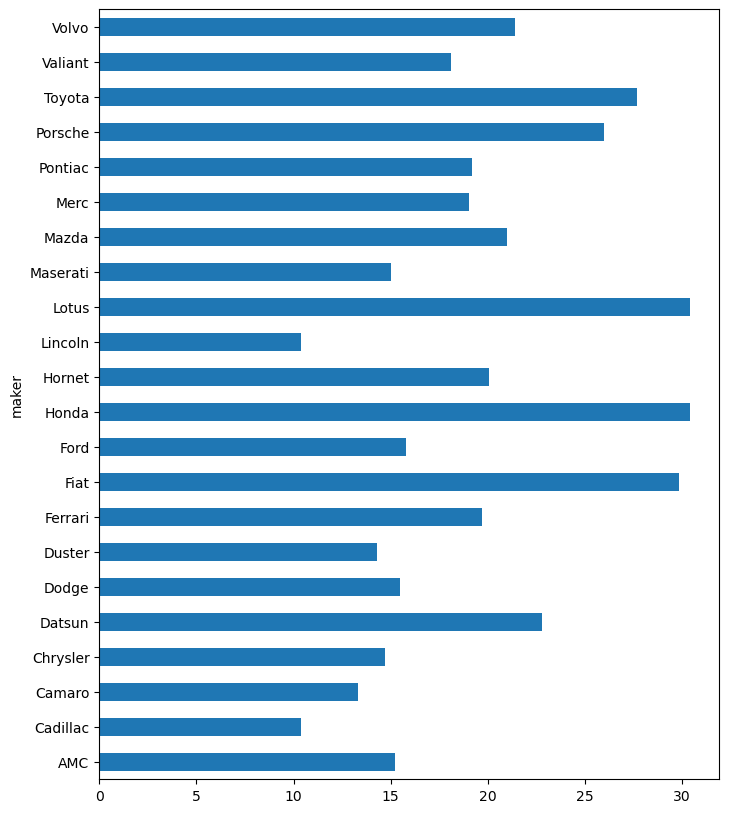

In [6]:
plt.figure(figsize=(8, 10))
av_mpg.plot(kind="barh")

Here we are clearly using length to encode the numerical values, all in one color. What models of visual expression are most efficient?

![](images/datatypesmodes.jpeg)

## Co-relations and diverging Palettes

Color is indeed not the most efficient. But when spatial information is *taken up* by something else we must use it, as in a map, or a correlation matrix, or a more than 1-D probability density)

In [7]:
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


Since correlations range from -1 to 1 through 0, a diverging palette is probably our best bet.

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

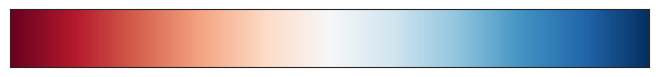

In [9]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

We use `maptplotlib`s correlation plot. You'll land up doing plots like this for both EDA and do see misclassification from your machine learning algorithms. In other words, EDA is even useful at the analysis stage.

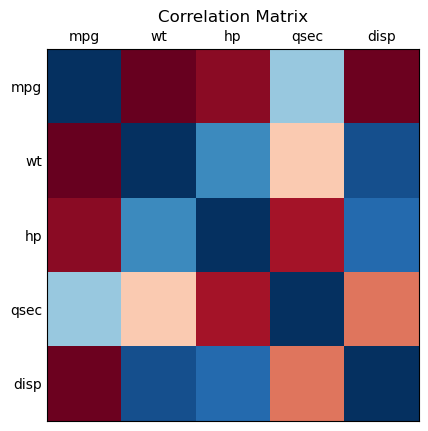

In [27]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp']);


### Density Plots and Sequential Palettes.

Here we make a KDE plot of a multivariate normal distribution. Since a probability density is strictly positive, with values near 0 not being so interesting, a sequential palette is our ticket. Seaborn will by default provide such a palette for KDE plots, but you can use your own!

In [12]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-1.066080,-0.805778
1,0.198354,0.063227
2,-0.158132,2.016113
3,-1.298668,0.802609
4,-0.586285,-0.547285


interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

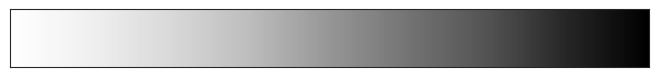

In [13]:
seqpal = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

/Users/rahul/miniforge3/envs/ml1-arm64/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


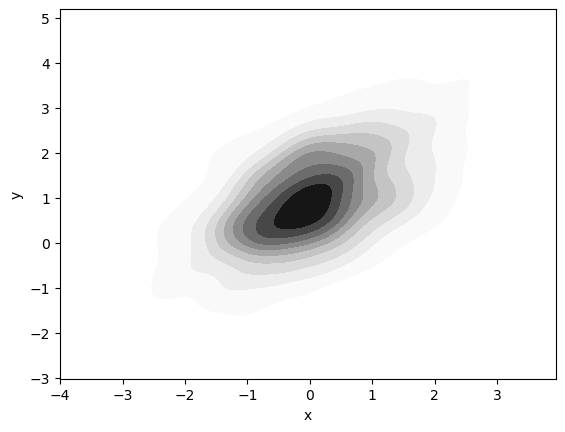

In [14]:
sns.kdeplot(df.x, df.y, cmap=seqpal, shade=True);

In 1-D you dont need such a palette: you can just use one color, as you are once again using spatial information. For 2D colormaps, you could use a 3-D plot, but these are harder to interpret. For example a good cartograph of mountains is often easier to read than a fake-3d rendering. Indeed a subtle use of color, and other markings can render far better than 3d...

![](https://s3.amazonaws.com/edwardtufte.com/Thinking%20Eye/SwissMap1.jpg)

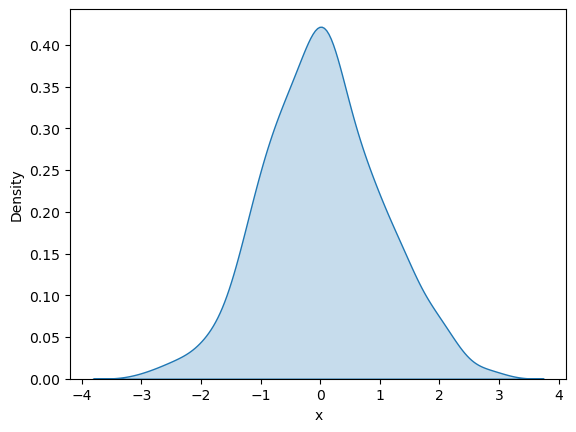

In [31]:
sns.kdeplot(df.x, shade=True);

## The Interest in Science Problem: which graphical mode to use?

![](images/questionasked.png)

You are given this data. Let us think of some ways to display this...

In [15]:
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


### Multiple Pie Charts

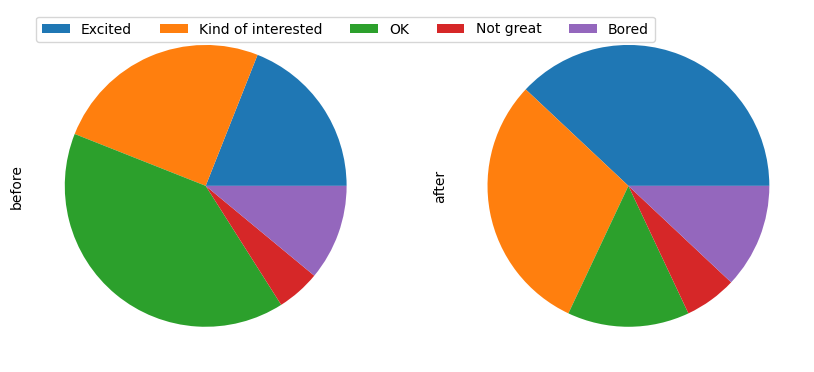

In [16]:
fig, axs = plt.subplots(1,2, figsize = (10,6))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);


### Before and after bar charts

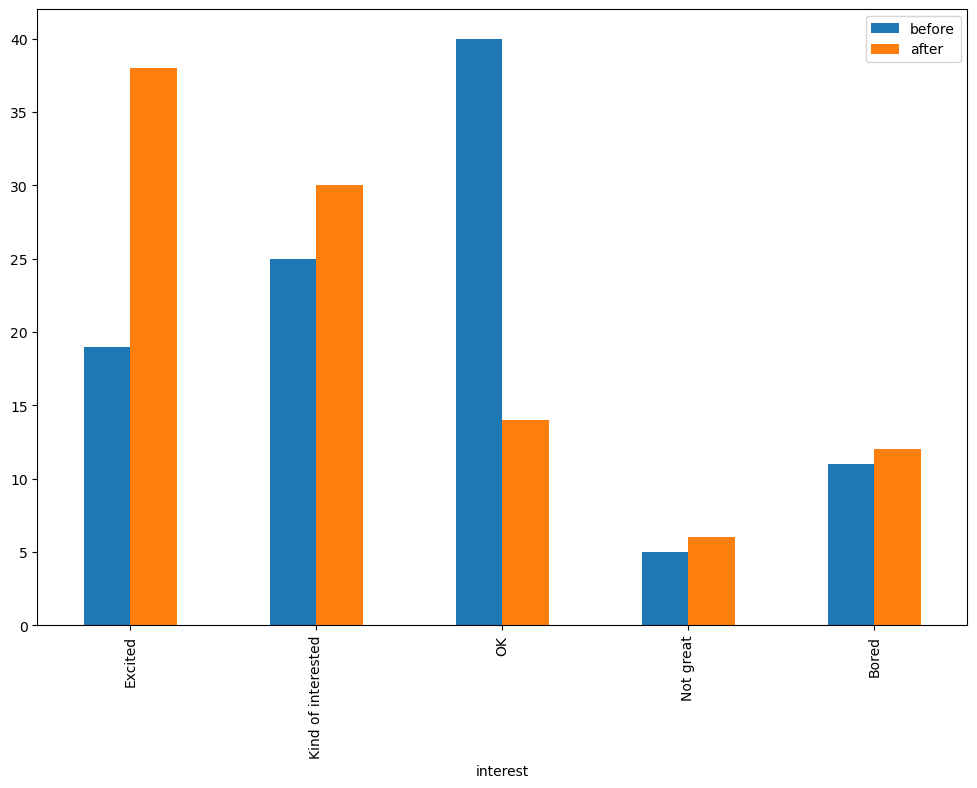

In [17]:
plt.figure(figsize=(12,8))
ax = plt.gca()
dfscience.plot(ax = ax, kind="bar");

### Stacked Charts


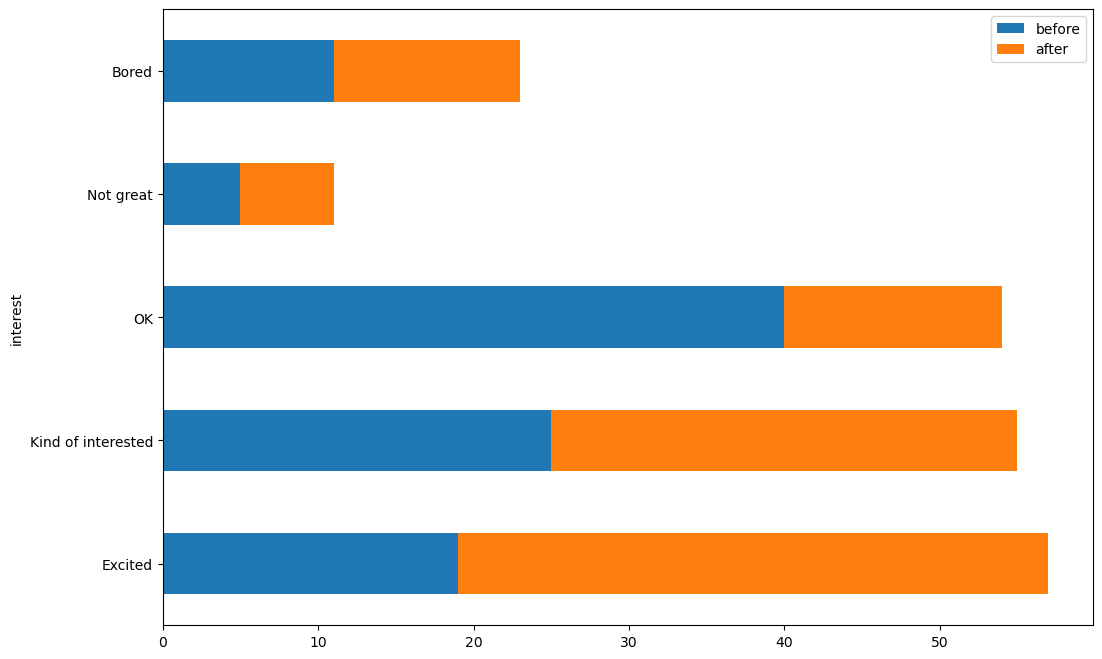

In [18]:
plt.figure(figsize=(12,8));
ax = plt.gca()
dfscience.plot(ax=ax, kind="barh", stacked=True);

This is hard to read. We want to compare before and after easily. Sometimes the solution is a transpose!!

In [19]:
dfscience.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


We have to play some games to get the ordering right...

In [20]:
dfst = dfscience.transpose()
dfst.iloc[[1, 0],:]

interest,Excited,Kind of interested,OK,Not great,Bored
after,38,30,14,6,12
before,19,25,40,5,11


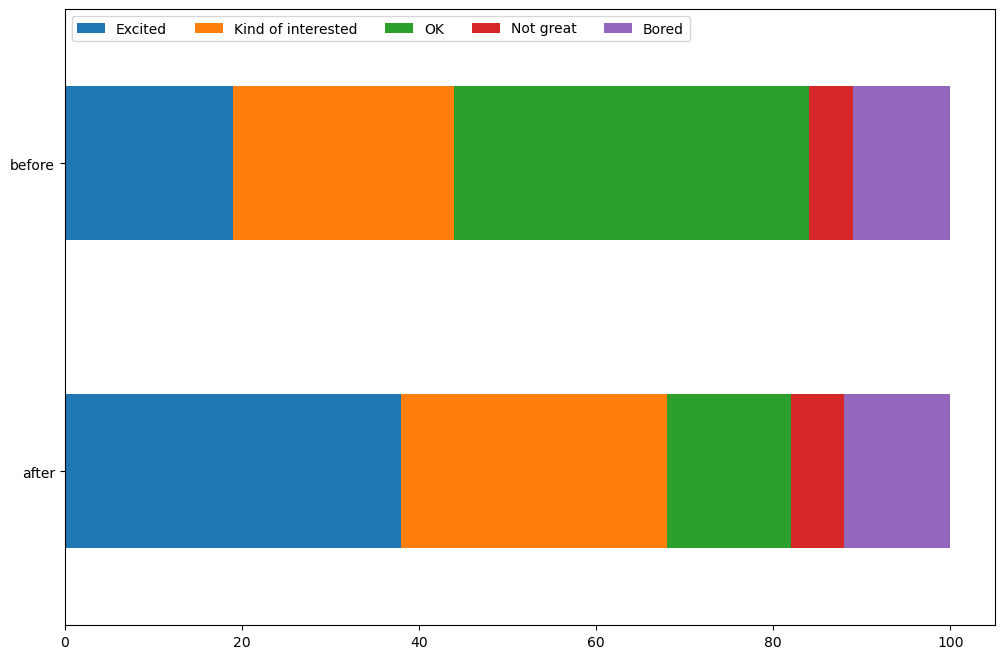

In [21]:
plt.figure(figsize=(12,8));
ax = plt.gca()
dfscience.transpose().loc[['after', 'before'], :].plot(ax=ax, kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

Now we see that the blue and greens have it. Try and improve this plot. It still has too much chartjunk.

### Difference Bar chart

Sometimes a small data transformation makes the effect blindingly obvious. Here we just make a bar chart of the change!

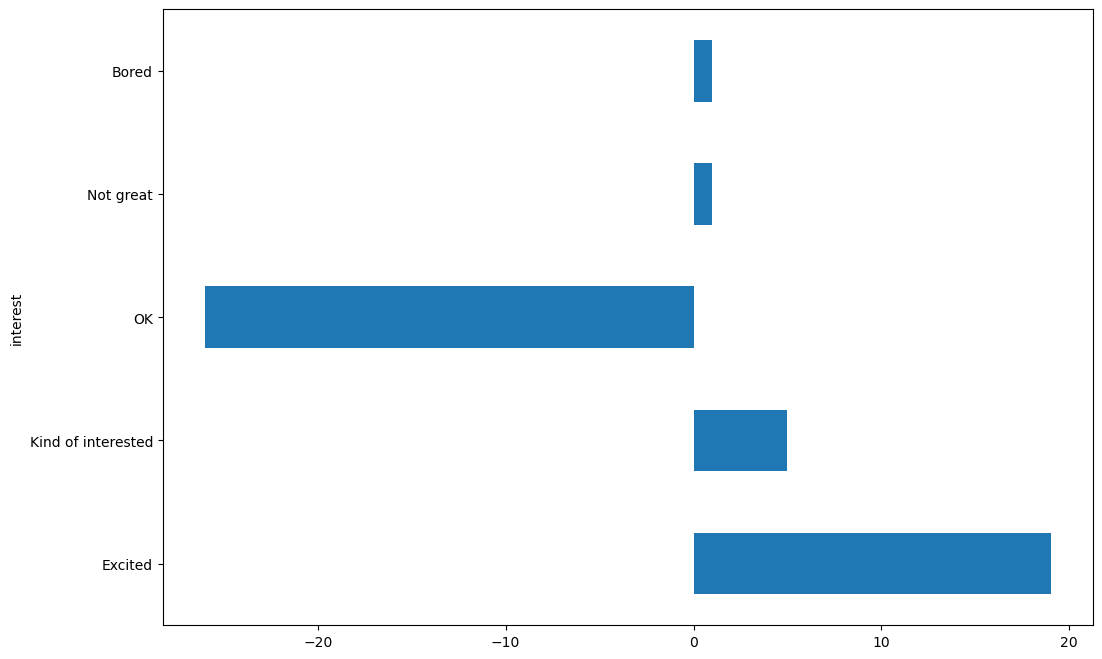

In [22]:
plt.figure(figsize=(12,8));
ax = plt.gca()
(dfscience.after - dfscience.before).plot(kind="barh", ax=ax);

### Slopegraph

In [23]:
dfst.head()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


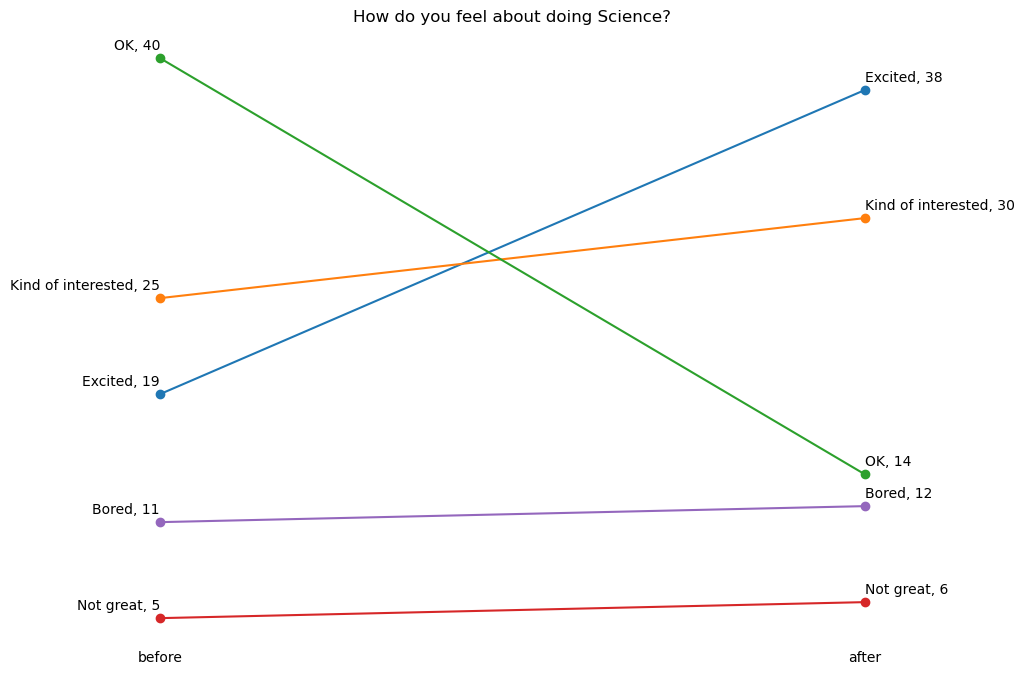

In [24]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
ax.set_yticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for kind in ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored']:
    vals = dfst[kind]
    plt.plot(vals, 'o-')
    plt.annotate(kind+", "+str(vals['before']), xy = ('before', vals['before']+0.5), ha='right')
    plt.annotate(kind+", "+str(vals['after']), xy = ('after', vals['after']+0.5), ha='left')

plt.title("How do you feel about doing Science?");